<a href="https://colab.research.google.com/github/Yogananth-r/Classify-3-7-NN-PyTorch/blob/main/Classify_3_%26_7_NN_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt

In [4]:
mnist = datasets.MNIST('./data',download=True)
threes = mnist.data[(mnist.targets==3)]/255.0
sevens = mnist.data[(mnist.targets==7)]/255.0
len(threes),len(sevens)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



(6131, 6265)

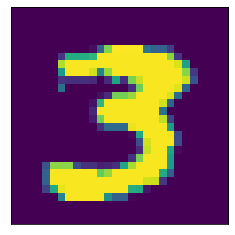

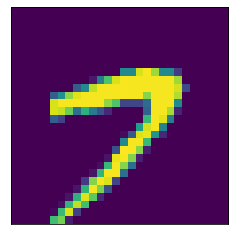

In [7]:
def show_image(img):
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

show_image(threes[3])
show_image(sevens[8])

In [9]:
print(threes.shape, sevens.shape)

torch.Size([6131, 28, 28]) torch.Size([6265, 28, 28])


In [10]:
combined_data = torch.cat([threes,sevens])
combined_data.shape

torch.Size([12396, 28, 28])

In [11]:
flat_imgs = combined_data.view((-1,28*28))
flat_imgs.shape

torch.Size([12396, 784])

In [12]:
target = torch.tensor([1]*len(threes)+[2]*len(sevens))
target.shape

torch.Size([12396])

In [13]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))
def simple_nn(data, weights, bias):
  return sigmoid((data@weights)+bias)

In [16]:
w= torch.randn((flat_imgs.shape[1],1), requires_grad=True)
b=torch.randn((1,1),requires_grad=True)

In [18]:
def error(pred, target):
  return ((pred-target)**2).mean()

In [19]:
for i in range(6):
  pred = simple_nn(flat_imgs,w,b)
  loss=error(pred,target.unsqueeze(1))
  loss.backward()

  w.data -=0.001 * w.grad.data
  b.data -=0.001*b.grad.data
  print("Loss: ",loss.item())

  w.grad.zero_()
  b.grad.zero_()

Loss:  1.1611740589141846
Loss:  1.1607046127319336
Loss:  1.1602354049682617
Loss:  1.1597667932510376
Loss:  1.1592987775802612
Loss:  1.1588311195373535


In [20]:
import numpy as np
import pandas as pd

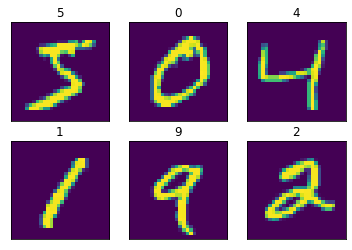

In [21]:
def sample_mnist(row, col):
  for i in range(row*col):
    plt.subplot(row,col,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(mnist[i][1])
    plt.imshow(np.array(mnist[i][0]))
  plt.show()
sample_mnist(2,3)

In [22]:
def rep_pixels(idx):
  df= pd.DataFrame(np.array(mnist[idx][0]))
  print("\tPixel representation for the digit: {}.\n".format(mnist[idx][1]))
  return df.style.set_properties(**{'font-size':'10pt'}).background_gradient('Greys')

rep_pixels(50)

	Pixel representation for the digit: 3.



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,12,56,140,126,175,200,96,2,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,35,166,238,254,246,242,253,246,254,67,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,184,182,146,127,70,30,45,36,215,175,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,207,246,14,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,251,169,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,215,232,20,0,0,0,0,0,0,0,0,0,0
